# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [ ]:
%pip install iso3166

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [ ]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.2 MB 4.0 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


# Google docs connection

In [ ]:
#Execute the cell and follow the steps, it is necessary to connect with the user account in which the files are contained.from google.colab import drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# These might be helpful:
#We will need to use the iso3166 package to convert the country names to Alpha3 format.
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [ ]:
path = "Your_path"
data = pd.read_csv(f'{path}spaceflights_data.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
data.shape

(6378, 8)

In [ ]:
print(f"Dataframe has {data.shape[0]} rows and {data.shape[1]} columns")

Dataframe has 6378 rows and 8 columns


In [ ]:
data.columns

Index(['Unnamed: 0', 'Organisation', 'Location', 'Date', 'Detail',
       'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [ ]:
# examine the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6378 entries, 0 to 6377
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      6378 non-null   int64 
 1   Organisation    6378 non-null   object
 2   Location        6378 non-null   object
 3   Date            6378 non-null   object
 4   Detail          6378 non-null   object
 5   Rocket_Status   6378 non-null   object
 6   Price           2376 non-null   object
 7   Mission_Status  6378 non-null   object
dtypes: int64(1), object(7)
memory usage: 398.8+ KB


In [ ]:
data.head()

,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Sun Sep 11, 2022 01:20 UTC","Falcon 9 Block 5 | Starlink Group 4-2, BlueWal...",Active,$67.0 million,Success
1,1,Arianespace,"ELA-3, Guiana Space Centre, French Guiana, France","Wed Sep 07, 2022 21:45 UTC",Ariane 5 ECA | Eutelsat Konnect VHTS,Active,$200.0 million,Success
2,2,CASC,"LC-3, Xichang Satellite Launch Center, China","Tue Sep 06, 2022 04:19 UTC",Long March 2D | Yaogan 35 Group 05,Active,$29.75 million,Success
3,3,CASIC,"Site 95, Jiuquan Satellite Launch Center, China","Tue Sep 06, 2022 02:24 UTC",Kuaizhou 1A | CentiSpace-1 S3 & S4,Active,$5.8 million,Success
4,4,SpaceX,"SLC-40, Cape Canaveral SFS, Florida, USA","Mon Sep 05, 2022 02:09 UTC",Falcon 9 Block 5 | Starlink Group 4-20 and Var...,Active,$67.0 million,Success


In [ ]:
data.tail()

,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
6373,6373,US Navy,"LC-18A, Cape Canaveral SFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,Retired,NaN,Failure
6374,6374,ABMA,"LC-26A, Cape Canaveral SFS, Florida, USA","Sat Feb 01, 1958 03:47 UTC",Juno I | Explorer 1,Retired,NaN,Success
6375,6375,US Navy,"LC-18A, Cape Canaveral SFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,Retired,NaN,Failure
6376,6376,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik 2,Retired,NaN,Success
6377,6377,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Oct 04, 1957 19:28 UTC",Sputnik 8K71PS | Sputnik 1,Retired,NaN,Success


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [ ]:
#Removing columns with junk data.
data_cleaned = data.drop('Unnamed: 0', axis=1) #Features selection.

In [ ]:
data_cleaned.columns

Index(['Organisation', 'Location', 'Date', 'Detail', 'Rocket_Status', 'Price',
       'Mission_Status'],
      dtype='object')

In [ ]:
print(f'Missing values in data?: {data_cleaned.isna().values.any()}')
print(f'Duplicated values in data?: {data_cleaned.duplicated().values.any()}')

Missing values in data?: True
Duplicated values in data?: False


In [ ]:
#info() allows us to see the count of non-null data in each column of the data frame.  
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6378 entries, 0 to 6377
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    6378 non-null   object
 1   Location        6378 non-null   object
 2   Date            6378 non-null   object
 3   Detail          6378 non-null   object
 4   Rocket_Status   6378 non-null   object
 5   Price           2376 non-null   object
 6   Mission_Status  6378 non-null   object
dtypes: object(7)
memory usage: 348.9+ KB


# Data Type Conversions

Convert the `Date` column to Pandas `Datetime` objects
<br>
<br>

In [ ]:
df_data_converted = data_cleaned.copy()

print(f"Actual Date column type: {type(df_data_converted['Date'][1])}")

df_data_converted['Date'] = pd.to_datetime(df_data_converted['Date'], errors='coerce', utc=True)
df_data_converted['Date'] = df_data_converted['Date'].dt.date

print(f"New Date column type: {type(df_data_converted['Date'][1])}")
df_data_converted.head(3)

Actual Date column type: <class 'str'>
New Date column type: <class 'datetime.date'>


,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2022-09-11,"Falcon 9 Block 5 | Starlink Group 4-2, BlueWal...",Active,$67.0 million,Success
1,Arianespace,"ELA-3, Guiana Space Centre, French Guiana, France",2022-09-07,Ariane 5 ECA | Eutelsat Konnect VHTS,Active,$200.0 million,Success
2,CASC,"LC-3, Xichang Satellite Launch Center, China",2022-09-06,Long March 2D | Yaogan 35 Group 05,Active,$29.75 million,Success


# Splitting data 
Two data frames will be created to differentiate releases whose price is known. 

Converting the Price column to a numeric format by removing `$` signs and `million` word.

In [ ]:
df_launches_price = df_data_converted.dropna()
df_launches_price.Price = df_launches_price.Price.replace(r'million', '', regex=True).str.replace('$', '').str.replace(',', '').astype(float)
print(f"New Date column type: {type(df_launches_price['Price'][1])}")

data_cleaned.info()

New Date column type: <class 'numpy.float64'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6378 entries, 0 to 6377
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    6378 non-null   object
 1   Location        6378 non-null   object
 2   Date            6378 non-null   object
 3   Detail          6378 non-null   object
 4   Rocket_Status   6378 non-null   object
 5   Price           2376 non-null   object
 6   Mission_Status  6378 non-null   object
dtypes: object(7)
memory usage: 348.9+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


## Descriptive Statistics

In [ ]:
df_data_converted.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,6378,6378,6378,6378,6378,2376,6378
unique,60,149,5593,6319,2,66,4
top,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",2022-08-04,Soyuz U | Resurs-F,Retired,$20.0 million,Success
freq,2477,487,6,20,5133,800,5821


In [ ]:
df_launches_price.describe()

,Price
count,"2,376.00"
mean,79.23
std,156.74
min,2.50
25%,20.00
50%,29.75
75%,65.00
max,"3,000.00"


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [ ]:
aerospace_organization = df_data_converted.Organisation.value_counts()
#aerospace_organization.head()

In [ ]:
bar = px.bar(x = aerospace_organization.index, # index = category name
             y = aerospace_organization.values,
             color_continuous_scale="Aggrnyl")
bar.update_layout(xaxis_title='Aerospace Organization', xaxis={'categoryorder':'min descending'}, 
                  yaxis_title='Launches by organisation', yaxis=dict(type='log'))

bar.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [ ]:
rocket_count = df_data_converted.Rocket_Status.value_counts()
rocket_count

 Retired    5133
 Active     1245
Name: Rocket_Status, dtype: int64

In [ ]:
bar = px.bar(x=['Retired', 'Active'],
             y=rocket_count.values,
             color=rocket_count.values,
             color_continuous_scale=px.colors.sequential.Plasma,
             title='Active Compared to Retired Rockets')

bar.update_layout(xaxis_title='Active vs Decomissioned Rockets', 
                  yaxis_title='Number of Rockets',
                  coloraxis_showscale=False)
bar.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

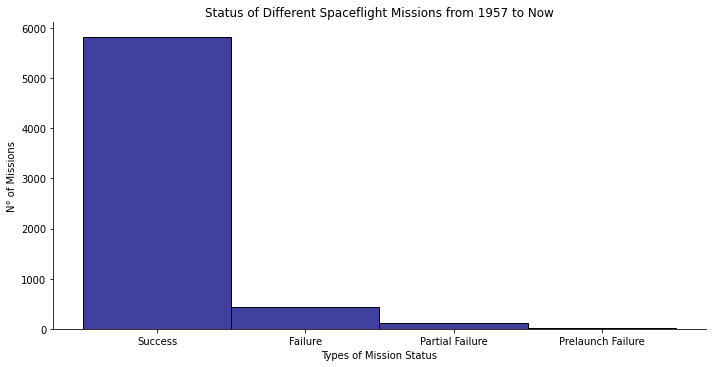

In [ ]:
sns.displot(df_data_converted, 
            x='Mission_Status', 
            aspect=2, 
            color='navy')
plt.title(f'Status of Different Spaceflight Missions from 1957 to Now')
plt.xlabel('Types of Mission Status')
plt.ylabel('N° of Missions')
plt.show()

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [ ]:
df_launches_price.columns

Index(['Organisation', 'Location', 'Date', 'Detail', 'Rocket_Status', 'Price',
       'Mission_Status'],
      dtype='object')

In [ ]:
fig = px.histogram(df_launches_price, x="Price", histnorm='percent')
# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

# Using a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)

Wrangle the Country Names

It's necesary to use a 3 letter country code for each country. To this, we have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


WE use the iso3166 package to convert the country names to Alpha3 format.

In [ ]:
#Adding a new column "Country" with country launch.
# .str[-1] aloow us to get the last string of .split() method.
#To eliminate spaces implement .str.strip().
df_data_converted["Country"] = df_data_converted["Location"].str.split(",").str[-1].str.strip()

#We will have to replace some of the launch locations with their actual country.
df_data_converted.replace({'Country' : {'Russia' : 'Russian Federation',
                                                'New Mexico' : 'USA',
                                                'Yellow Sea' : 'China',
                                                'Shahrud Missile Test Site' : 'IRN',
                                                'Iran' : 'IRN',
                                                'Pacific Missile Range Facility' : 'USA',
                                                'Barents Sea' : 'Russian Federation',
                                                'Gran Canaria' : 'USA',
                                                'South Korea' : 'Korea, Republic of',
                                                'North Korea' : 'Korea, Democratic People\'s Republic of',
                                                'Pacific Ocean' : 'USA'}}, inplace=True)

In [ ]:
#Adding a new columns with country recurrence counts.
countries_count =  df_data_converted.groupby(['Country'], as_index=False).agg({'Location': pd.Series.count})
countries_count.sort_values('Location', ascending=False, inplace=True)

In [ ]:
#Getting 3 letter country code for each country.
from iso3166 import countries
country_code = []
for country in countries_count['Country']:
  country_code.append(countries.get(country).alpha3)

countries_count['Country_code'] = country_code
#countries_count.head()

In [ ]:
map = px.choropleth(countries_count, locations="Country_code",
                    color='Location',
                    hover_name='Country', # column to add to hover information
                    title='Number of Launches by Country',
                    color_continuous_scale=px.colors.sequential.matter,
                     labels={'Location':'Launch count'})

map.update_layout(coloraxis_showscale=True,)
 
map.show()

# Using a Choropleth Map to Show the Number of Failures by Country


In [ ]:
mission_failure = df_data_converted.loc[df_data_converted.Mission_Status == 'Failure']
failures_by_country =  mission_failure.groupby(['Country'], as_index=False).agg({'Mission_Status': pd.Series.count})
failures_by_country.head()

,Country,Mission_Status
0,Australia,4
1,Brazil,2
2,China,25
3,France,14
4,IRN,8


In [ ]:
#Get country code with .merge() .
failures_by_country = failures_by_country.merge(countries_count, how='inner', on='Country').drop(['Location'], axis=1)
failures_by_country.sort_values('Mission_Status', ascending=False, inplace=True)
failures_by_country.head()

,Country,Mission_Status,Country_code
14,USA,163,USA
8,Kazakhstan,113,KAZ
13,Russian Federation,72,RUS
2,China,25,CHN
3,France,14,FRA


In [ ]:
map = px.choropleth(failures_by_country, locations='Country_code',
                    color='Mission_Status', # lifeExp is a column of gapminder
                    hover_name='Country', # column to add to hover information
                    title='Number of Launch Failures by Country',
                    color_continuous_scale=px.colors.sequential.Viridis_r,
                    labels={'Mission_Status':'Mission fails'})

map.update_layout(coloraxis_showscale=True,)
 
map.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [ ]:
Launches_by_organisation = df_data_converted.groupby(['Country' , 'Organisation', 'Mission_Status'],  
                               as_index=False).agg({'Location': pd.Series.count})
Launches_by_organisation = Launches_by_organisation.sort_values('Location', ascending=True)
#Launches_by_organisation.head()

In [ ]:
df = px.data.tips()
fig = px.sunburst(Launches_by_organisation, path=['Country', 'Organisation', 'Mission_Status'], values='Location')
fig.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [ ]:
tpye_box = px.box(df_launches_price,
               x='Organisation',
               y='Price',
               title='Amount of Money Spent by Organisation on Space Missions',
               )

tpye_box.update_layout(xaxis_title='Organisation',
                       xaxis={'categoryorder':'min ascending'},
                    yaxis_title='MM',
                    yaxis=dict(type='log'),
                    )
 
tpye_box.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [ ]:
money_by_organization = df_launches_price.groupby(['Organisation'], 
                               as_index=False).agg({'Price': pd.Series.sum})
money_by_organization.sort_values(by='Price', ascending=True, inplace=True)
money_by_organization.tail()

,Organisation,Price
3,CASC,"13,836.13"
27,ULA,"16,661.00"
0,Arianespace,"18,283.00"
21,RVSN USSR,"20,200.00"
19,NASA,"76,280.00"


In [ ]:
h_bar = px.bar(money_by_organization, x = 'Price',
               y = 'Organisation',
               orientation='h',
               color_continuous_scale=px.colors.sequential.haline,
               title="Top 20 Research Cities by Number of Nobel laureates")
 
h_bar.update_layout(yaxis_title='Organisation',
                       yaxis={'categoryorder':'min ascending'},
                    xaxis_title='MM',
                    xaxis=dict(type='log'),
                    )
h_bar.show()

# Chart the Number of Launches per Year

In [ ]:
df_launch_yearly = df_data_converted[['Detail']].copy()
df_launch_yearly['Year'] = pd.DatetimeIndex(df_data_converted['Date']).year

In [ ]:
Launch_per_year = df_launch_yearly.groupby(by='Year').count().Detail
#Launch_per_year.head()

<font color="#65FF71">To calculate the 5-month moving average we use .rolling() and .mean().</font>

In [ ]:
moving_average = Launch_per_year.rolling(window=5).mean()


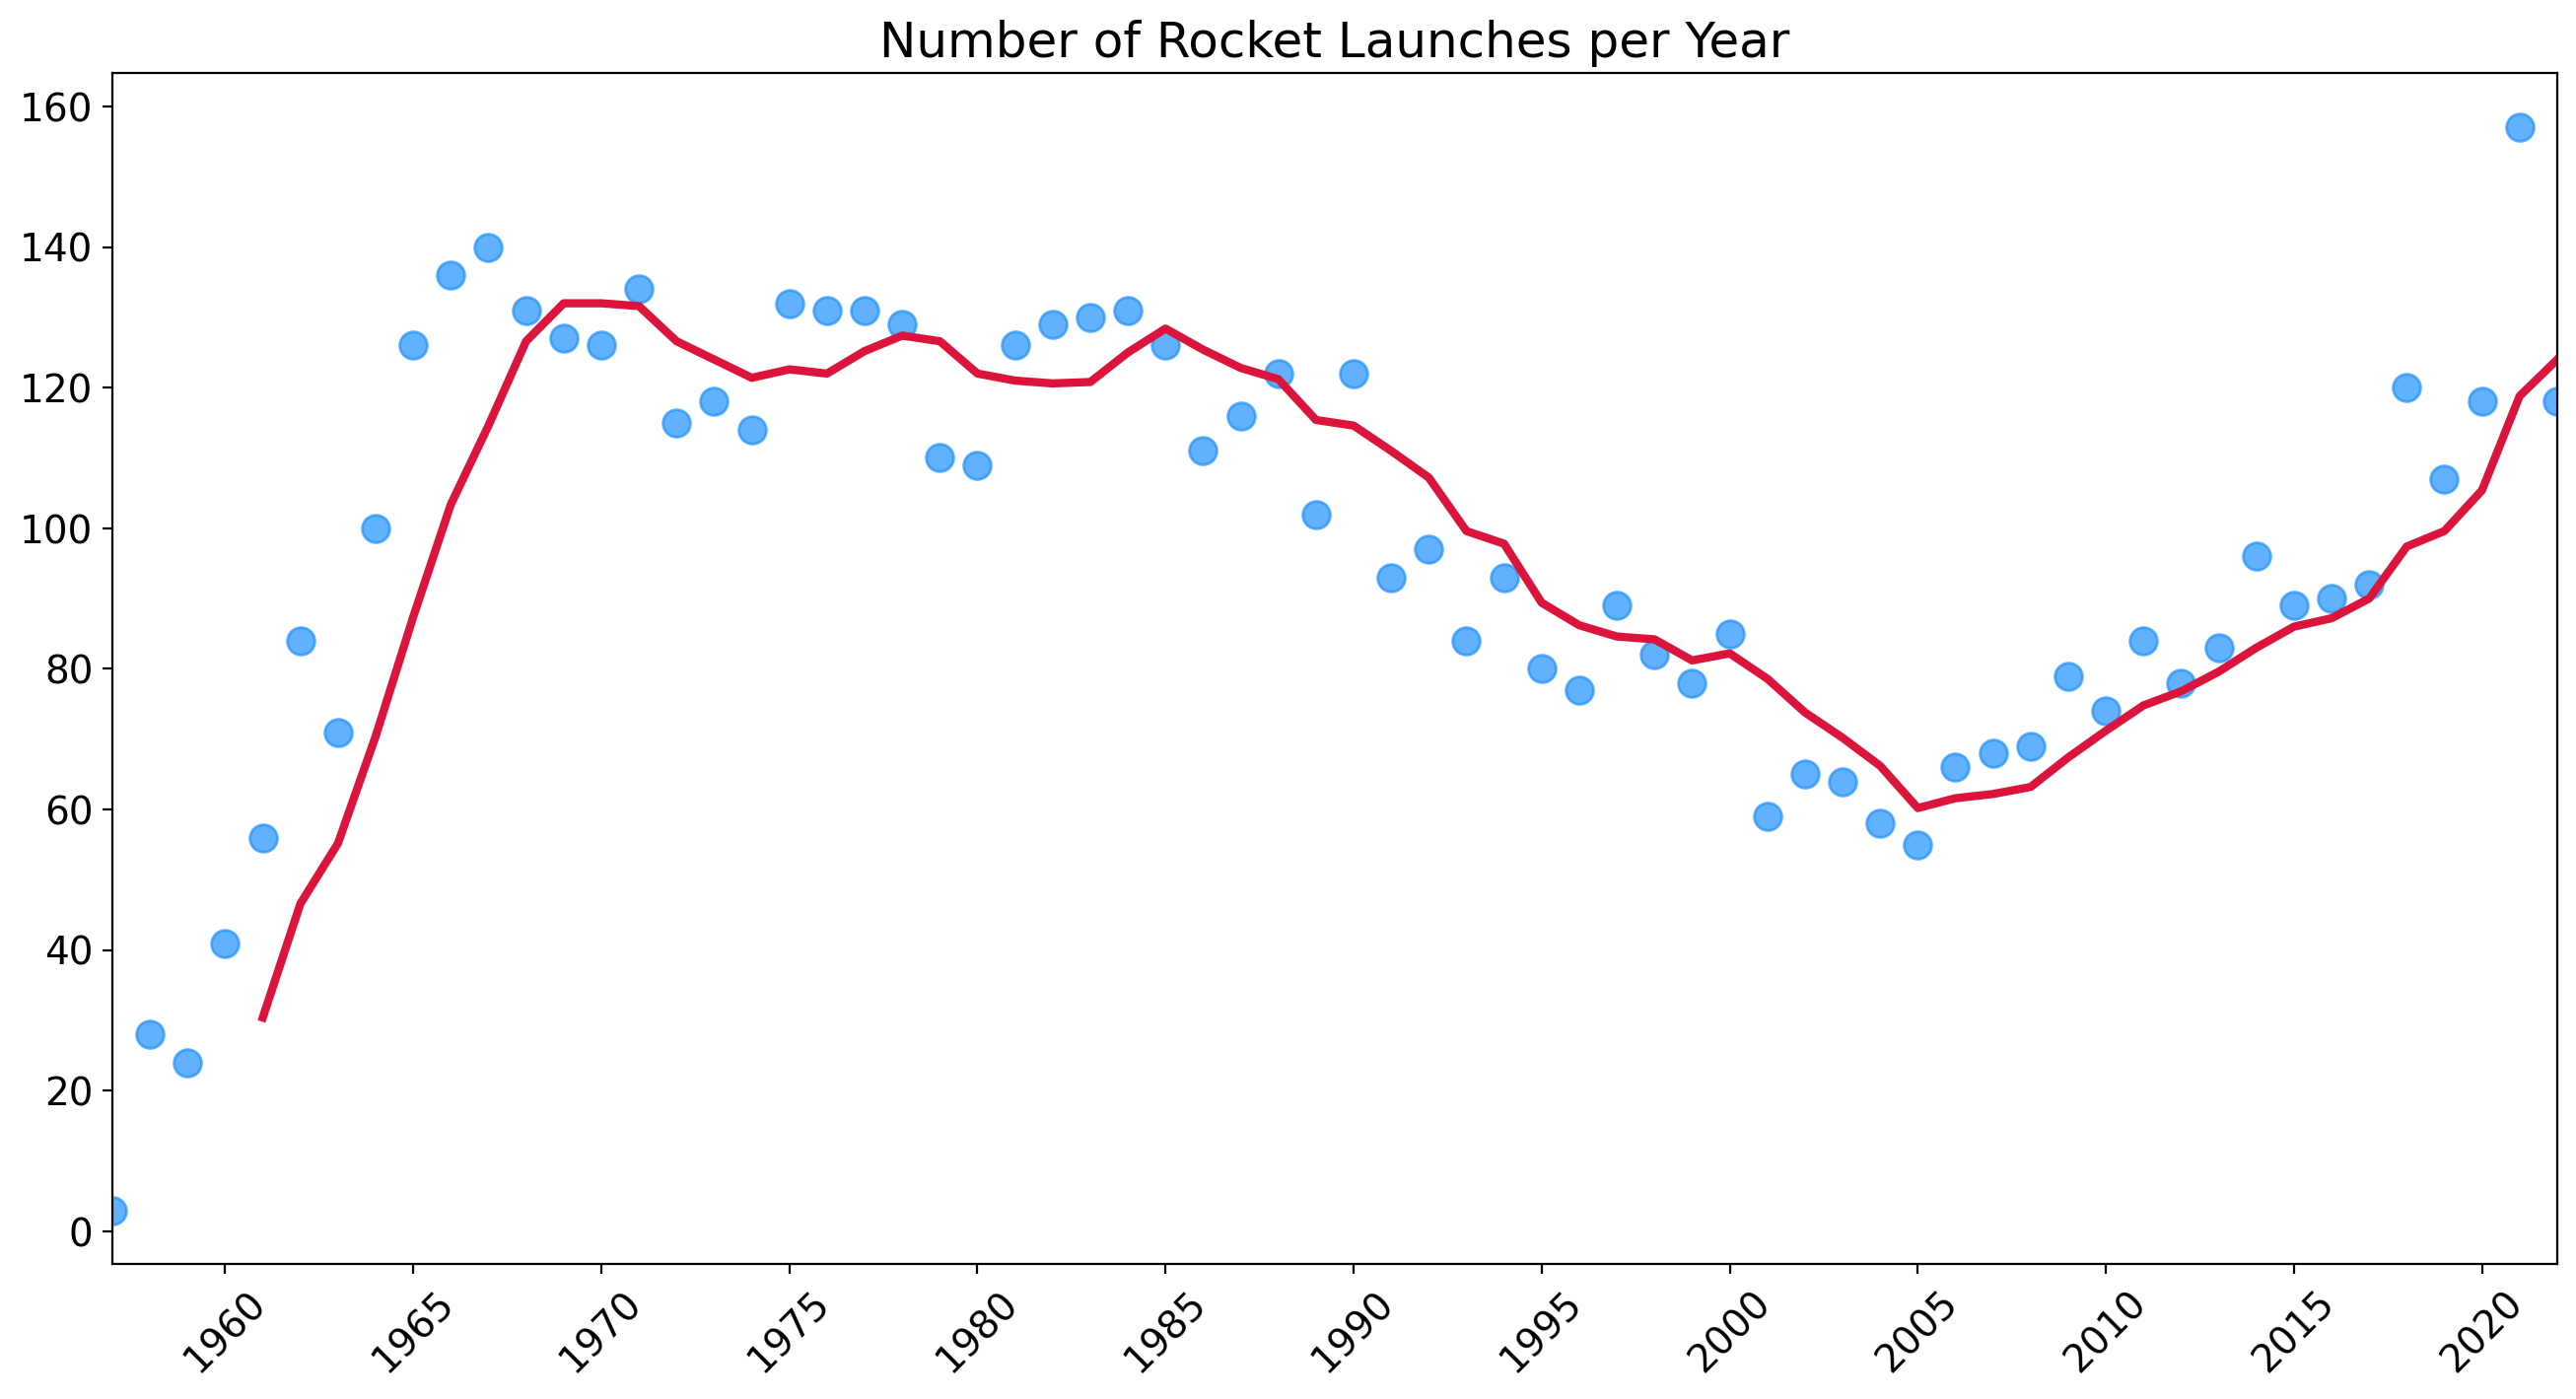

In [ ]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Rocket Launches per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)
 
ax = plt.gca() # get current axis

 
ax.scatter(x=Launch_per_year.index, 
           y=Launch_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
ax.plot(Launch_per_year.index, 
        moving_average.values, 
        c='crimson', 
        linewidth=3,)
ax.set_xlim(Launch_per_year.index.min(), Launch_per_year.index.max())

plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of releases of all time? To see this, we can overlay a moving average on the month-to-month time series chart.

In [ ]:
df_launch_monthly = df_data_converted[['Detail']].copy()

df_launch_monthly['Month'] = pd.DatetimeIndex(df_data_converted['Date']).month
df_launch_monthly['Year'] = pd.DatetimeIndex(df_data_converted['Date']).year

df_launch_monthly['Date'] = pd.to_datetime(df_launch_monthly[['Year', 'Month']].assign(DAY=1))

#df_launch_monthly.head()

In [ ]:
Launch_per_month = df_launch_monthly.groupby(by='Date', as_index=False).agg({'Detail': pd.Series.count})

In [ ]:
roll_df = Launch_per_month.set_index('Date')
roll_df = roll_df.rolling(window=6).mean()
#roll_df.head()

In [ ]:
# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

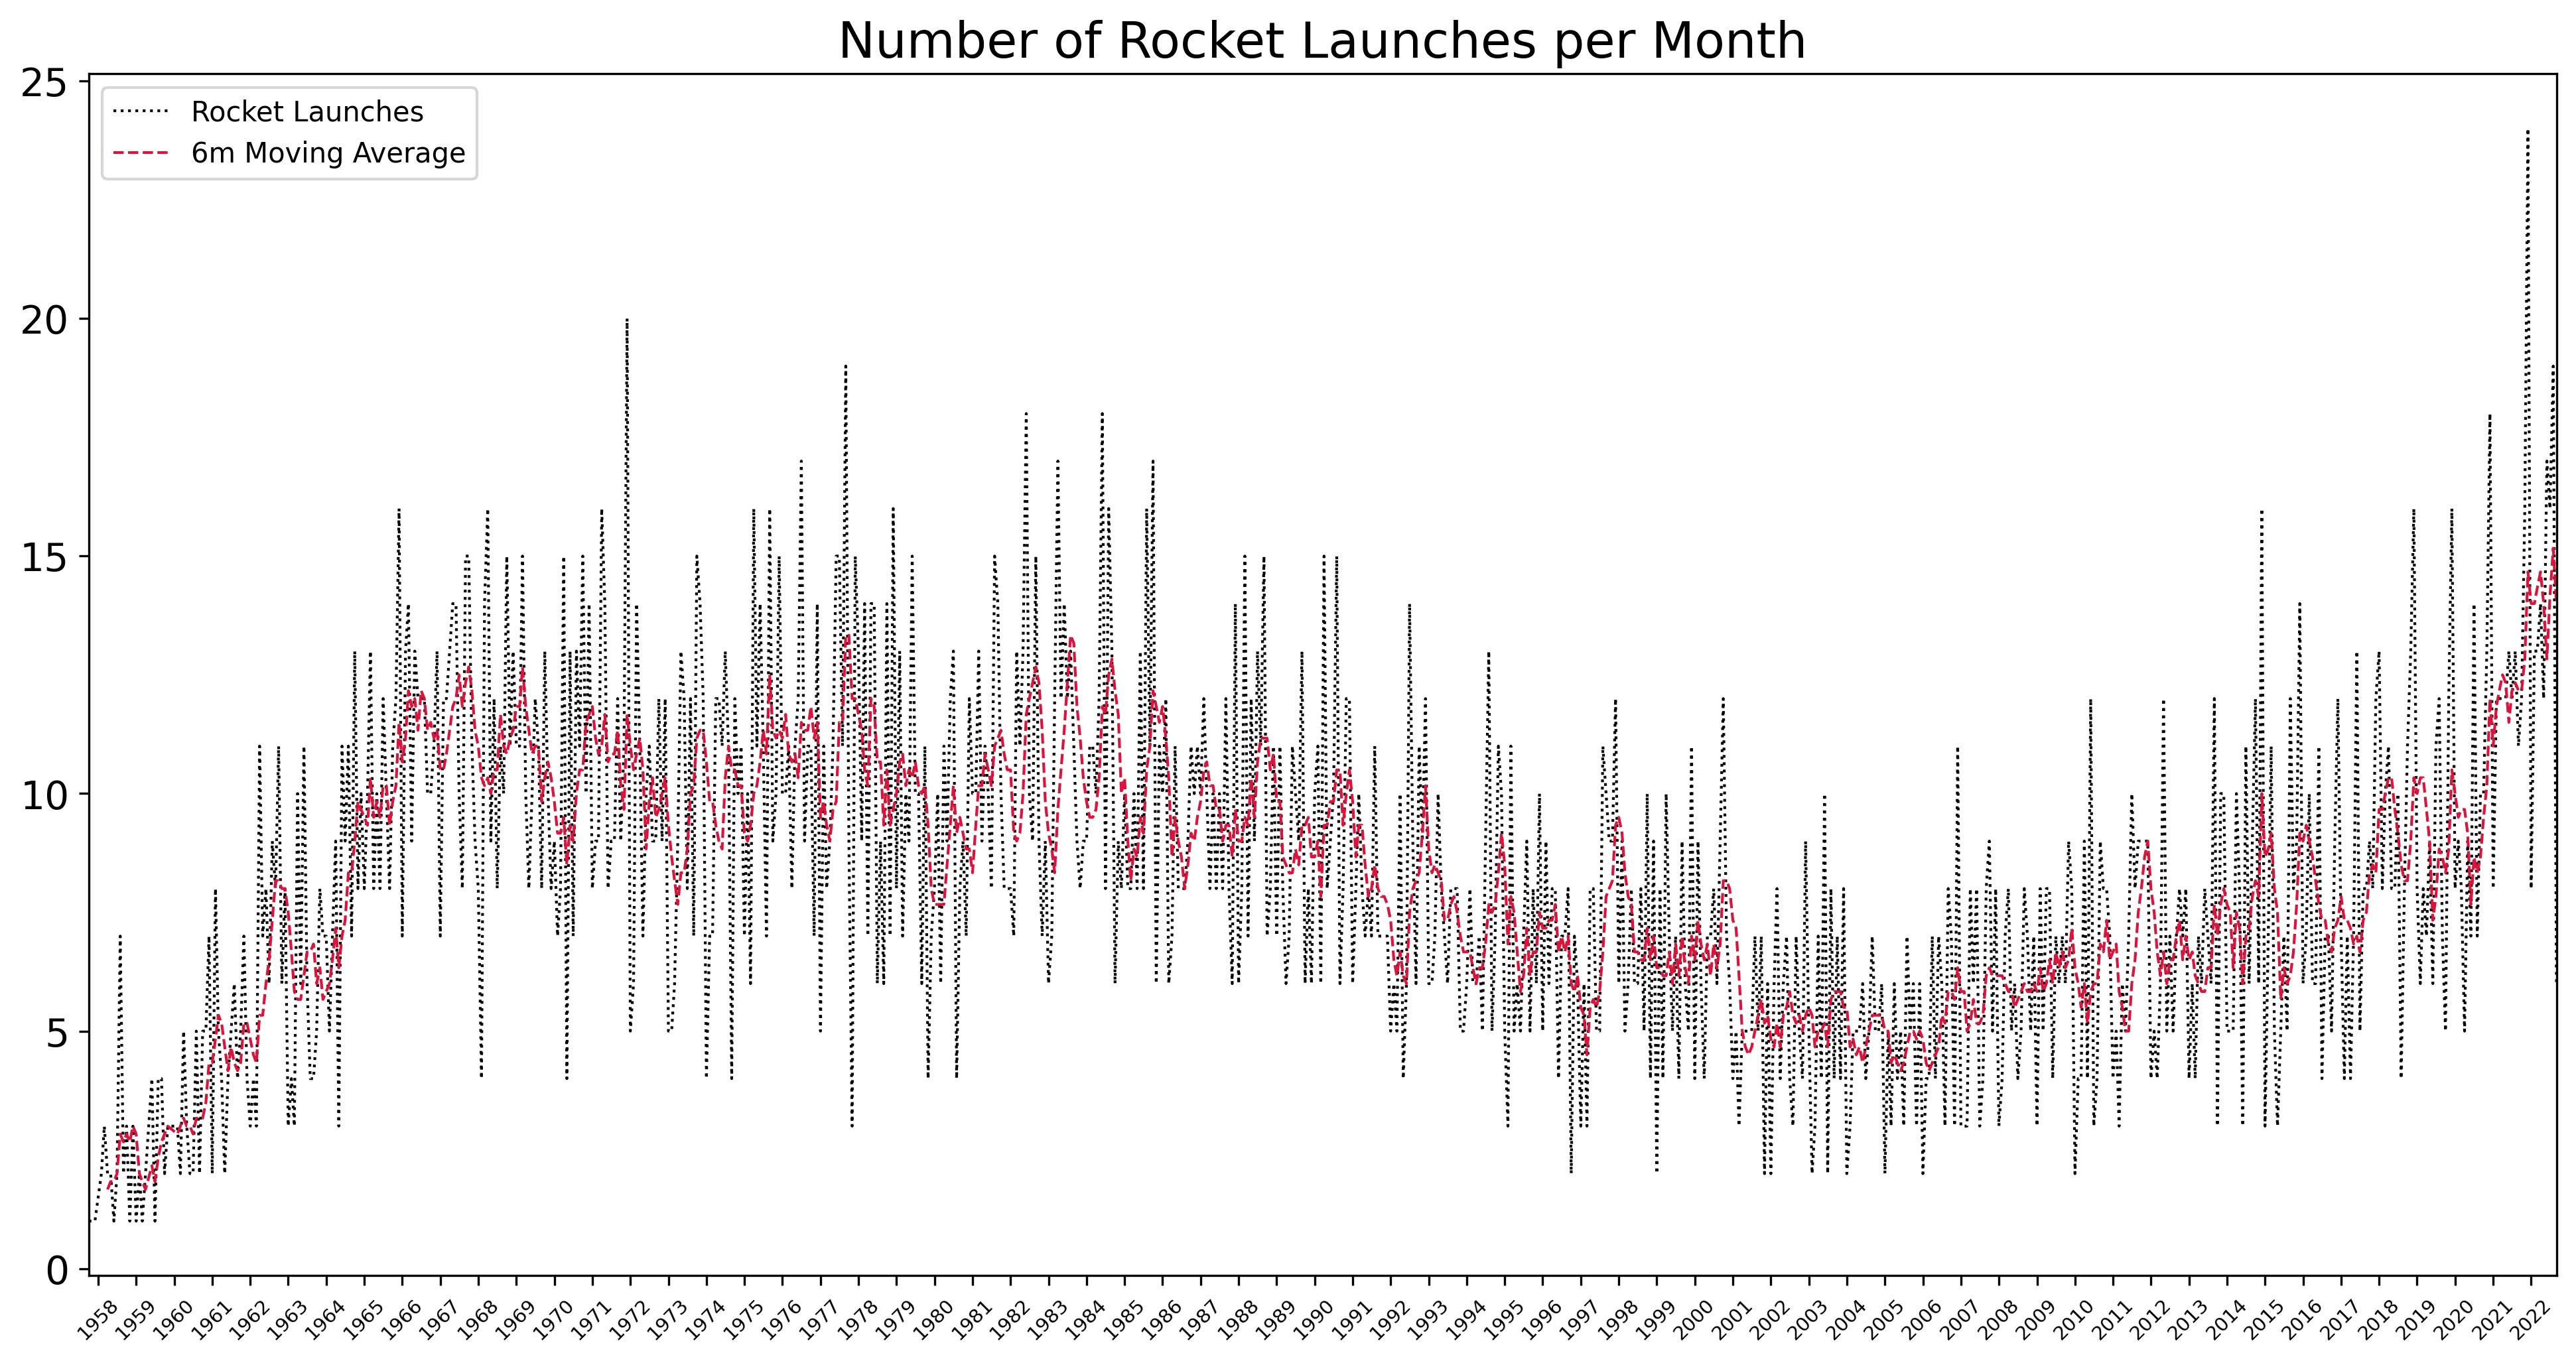

In [ ]:
plt.figure(figsize=(16,8), dpi=300)
plt.title('Number of Rocket Launches per Month', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=7, rotation=45)
 
ax = plt.gca() # get current axis

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)

ax.plot(Launch_per_month.Date, Launch_per_month.Detail, color="black", linewidth=1, linestyle=':', label = "Rocket Launches") 
ax.plot(roll_df.index, roll_df.Detail, color="crimson", linewidth=1, linestyle='--', label = "6m Moving Average")

ax.set_xlim(Launch_per_month.Date.min(), Launch_per_month.Date.max())

ax.legend()
plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others

In [ ]:
#Get the name of the month.
import calendar
df_launch_m = df_data_converted[['Detail']].copy()
df_launch_m['Month'] = pd.DatetimeIndex(df_data_converted['Date']).month
df_launch_m['Month'] = df_launch_m['Month'].apply(lambda x: calendar.month_abbr[x])

In [ ]:
Launch_per_month = df_launch_m.groupby(by='Month', as_index=False).agg({'Detail': pd.Series.count})
Launch_per_month.sort_values('Detail', inplace=True)
#Launch_per_month.head()

In [ ]:
h_bar = px.bar(x = Launch_per_month.Detail,
               y = Launch_per_month.Month,
               color= Launch_per_month.Detail,
               orientation='h',
               title='Launches per Month: Months most popular and least popular for launches'
               )
 
h_bar.update_layout(xaxis_title='Number of Launches', yaxis_title='Month')
h_bar.show()

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [ ]:
#Reset day of date
df_launches_price['Date'] = df_launches_price['Date'].apply(lambda dt: dt.replace(day=1))
df_launches_price['Year'] = pd.DatetimeIndex(df_launches_price['Date']).year
average_price_rocket = df_launches_price.groupby(by='Year', 
                                                  as_index=False).agg({'Price': pd.Series.mean})
average_price_rocket.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Price
54,2018,61.44
55,2019,52.69
56,2020,54.12
57,2021,50.54
58,2022,51.29


In [ ]:
# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%y')

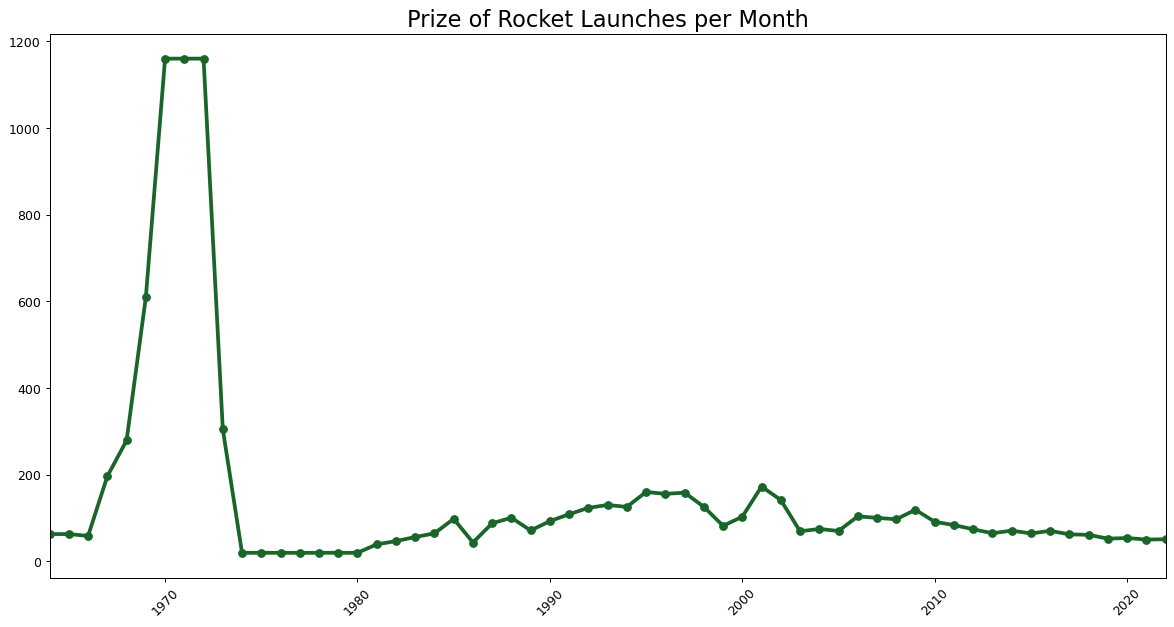

In [ ]:
plt.figure(figsize=(16,8), dpi=90)
plt.title('Prize of Rocket Launches per Month', fontsize=18)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10, rotation=45)
 
ax1 = plt.gca() # get current axis

# format the ticks

ax1.plot(average_price_rocket.Year, average_price_rocket.Price, color="#1a652a", linewidth=3, marker='o')

ax1.set_xlim([average_price_rocket.Year.min(), average_price_rocket.Year.max()])

plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [ ]:
#We need to select the top 10 organizations by number of Launches.
organiations = df_data_converted.groupby(by=['Organisation'], as_index=False).agg({'Detail': pd.Series.count})
organiations.sort_values("Detail", ascending=False, inplace=True)
top_10_organisations = organiations.head(10)
#top_10_organisations.head()

In [ ]:
#Creating dataframe that contains the Launches by top 10 organizations.
year_data = df_data_converted.loc[df_data_converted['Organisation'].isin(top_10_organisations['Organisation'])]
year_data['Year'] = pd.DatetimeIndex(year_data['Date']).year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#Launch_by_year Dataframe contains the sum of Launches of each organization by year.
launch_by_year = year_data.groupby(by=['Organisation', 'Year'], as_index=False).count()
launch_by_year = launch_by_year.sort_values('Year')[['Year', 'Organisation', 'Detail']]
#launch_by_year.head()

<font color="orange">Using this, we can create a chart, using the current birth organisation as the color:</font>

In [ ]:
l_chart = px.line(launch_by_year,
                  x='Year', 
                  y='Detail',
                  color='Organisation',
                  hover_name='Organisation',
                  title='Launches over Time by the Top 10 Organisations.',
                  labels={'Detail':'Launches'})
 
l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of Launches')
 
l_chart.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [ ]:
cold_war_df = df_data_converted[pd.DatetimeIndex(df_data_converted['Date']).year <= 1991]

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [ ]:
#Adding a new columns with country recurrence counts.
countries_count = cold_war_df.loc[cold_war_df['Country'].isin(['USA', 'Russian Federation', 'Kazakhstan'])]
reds_blues =  countries_count.groupby(['Country']).agg({'Location': pd.Series.count})

#Sum Russia and Kazakhstan Launches.
reds_blues.loc['Russian Federation'] += reds_blues.loc['Kazakhstan']

reds_blues.drop(['Kazakhstan'], inplace=True)

reds_blues.sort_values('Location', ascending=False, inplace=True)
#reds_blues.head()

In [ ]:
fig = px.pie(labels=['USSR', 'USA'],
values=reds_blues.Location,
title="Launches of USSR vs USA",
names=['USSR', 'USA'],
hole=0.3,
color_discrete_sequence=['red', 'blue'])


fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')
 
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [ ]:
#Creating dataframe that contains the three countries of insterest.
year_data = cold_war_df.loc[cold_war_df['Country'].isin(['USA', 'Russian Federation', 'Kazakhstan'])]
year_data['Year'] = pd.DatetimeIndex(year_data['Date']).year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#Launch_by_year Dataframe contains the sum of Launches of each country by year.
#Replacing 'Kazakhstan': 'Russian Federation' allow us to sum Launches of both countries by year in one.
launch_by_year = year_data.replace({'Country': {'Kazakhstan':
                                              'Russian Federation'}}).groupby(by=['Country', 'Year'], 
                                              as_index=False).count().replace({'Country': 
                                              {'Russian Federation' : 'USSR'}})
#Sorting DataFrame by count of Launches.
launch_by_year = launch_by_year.sort_values('Year')[['Year', 'Country', 'Detail']]
#launch_by_year.head()

<font color="orange">Using this, we can create a chart, using country as the color:</font>

In [ ]:
l_chart = px.line(launch_by_year,
                  x='Year', 
                  y='Detail',
                  color='Country',
                  hover_name='Country',
                  title='Launches over Time by USSR and USA',
                  labels={'Detail':'Launches'},
                  color_discrete_sequence=['red', 'blue'])
 
l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of Launches')
 
l_chart.show()

## Chart the Total Number of Mission Failures Year on Year.

In [ ]:
mission_failure = year_data.loc[year_data.Mission_Status == 'Failure']
#mission_failure.head()

In [ ]:
#Launch_by_year Dataframe contains the sum of Launches of each country by year.
#Replacing 'Kazakhstan': 'Russian Federation' allow us to sum Launches of both countries by year in one.
fail_launch_by_year = mission_failure.replace({'Country': {'Kazakhstan':
                                              'Russian Federation'}}).groupby(by=['Country', 'Year'], 
                                              as_index=False).count().replace({'Country': 
                                              {'Russian Federation' : 'USSR'}})

#Sorting DataFrame by count of Launches.
fail_launch_by_year = fail_launch_by_year.sort_values('Year')[['Year', 'Country', 'Detail']]
#fail_launch_by_year.head()

<font color="orange">Using this, we can create a chart, using country as the color:</font>

In [ ]:
l_chart = px.bar(fail_launch_by_year,
                  x='Year', 
                  y='Detail',
                  color='Country',
                  hover_name='Country',
                  title='Launches over Time by USSR and USA',
                  labels={'Detail':'Launches'},
                  color_discrete_sequence=['blue', 'red'])
 
l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of Launches')
 
l_chart.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [ ]:
#Calculate the percentage of failures for each year and country in the fail_launch_by_year data frame by adding a column called "Pct_fails".
#Get country code with .merge().
fail_launch_by_year = fail_launch_by_year.merge(launch_by_year, how='inner', on=['Year', 'Country'])
fail_launch_by_year['Pct_fails'] = fail_launch_by_year['Detail_x']/fail_launch_by_year['Detail_y']
#fail_launch_by_year.head()

In [ ]:
l_chart = px.line(fail_launch_by_year,
                  x='Year', 
                  y='Pct_fails',
                  color='Country',
                  hover_name='Country',
                  title='Percentaje Fails over Time by USSR and USA',
                  labels={'Detail':'Launches'},
                  color_discrete_sequence=['blue', 'red'])
 
l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of Launches')
 
l_chart.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including 2022)

Do the results change if we only look at the number of successful launches? 

In [ ]:
#Launch_by_year Dataframe contains the sum of Launches of each country by year.
#Replacing 'Kazakhstan': 'Russian Federation' allow us to sum Launches of both countries by year in one.
df_data_converted['Year'] = pd.DatetimeIndex(df_data_converted['Date']).year
country_launch_by_year = df_data_converted.groupby(by=['Country', 'Year'], 
                                              as_index=False).count()
#Sorting DataFrame by count of Launches. This allow us to get the Country lead in total launches.
country_launch_by_year = country_launch_by_year.sort_values('Detail', ascending=False)[['Year', 'Country', 'Detail']]
#country_launch_by_year.head()


In [ ]:
# dropping duplicate years.
country_launch_by_year.drop_duplicates(subset=["Year"],
                     keep='first', inplace=True)
#country_launch_by_year.head()

In [ ]:
l_chart = px.bar(country_launch_by_year,
                  x='Year', 
                  y='Detail',
                  color='Country',
                  hover_name='Country',
                  title='Country Lead in terms of Total Launches over Time',
                  labels={'Detail':'Launches'},
                  )
 
l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of Launches')
 
l_chart.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [ ]:
#Launch_by_year Dataframe contains the sum of Launches of each Organisation by year.
#Replacing 'Kazakhstan': 'Russian Federation' allow us to sum Launches of both countries by year in one.
df_data_converted['Year'] = pd.DatetimeIndex(df_data_converted['Date']).year
Organisation_launch_by_year = df_data_converted.groupby(by=['Organisation', 'Year'], 
                                              as_index=False).count()
#Sorting DataFrame by count of Launches. This allow us to get the Organisation lead in total launches.
Organisation_launch_by_year = Organisation_launch_by_year.sort_values('Detail', ascending=False)[['Year', 'Organisation', 'Detail']]
#Organisation_launch_by_year.head()


In [ ]:
# dropping duplicate years.
Organisation_launch_by_year.drop_duplicates(subset=["Year"],
                     keep='first', inplace=True)
#Organisation_launch_by_year.head()

In [ ]:
l_chart = px.bar(Organisation_launch_by_year,
                  x='Year', 
                  y='Detail',
                  color='Organisation',
                  hover_name='Organisation',
                  title='Organisation Lead in terms of Total Launches over Time',
                  labels={'Detail':'Launches'},
                  )
 
l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of Launches')
 
l_chart.show()